# Explain Model Decision

**Learning outcomes**:  What is explainable AI? How do radiologists view the usefulness of the outputs of current explainable AI methods?

* Review paper explainable AI methods: Reyes, Mauricio, et al. "On the interpretability of artificial intelligence in radiology: challenges and opportunities." Radiology: artificial intelligence 2.3 (2020). https://pubs.rsna.org/doi/full/10.1148/ryai.2020190043

* Grad-CAM: Selvaraju, Ramprasaath R., et al. "Grad-cam: Visual explanations from deep networks via gradient-based localization." Proceedings of the IEEE international conference on computer vision. (2017). http://openaccess.thecvf.com/content_ICCV_2017/papers/Selvaraju_Grad-CAM_Visual_Explanations_ICCV_2017_paper.pdf

* Integrated Gradients: Sundararajan, Mukund, Ankur Taly, and Qiqi Yan. "Axiomatic attribution for deep networks." International conference on machine learning. PMLR, (2017). http://proceedings.mlr.press/v70/sundararajan17a/sundararajan17a.pdf

## Setup Dataset and load your trained Model



#### Setup your DataLoader here

In [ ]:
# setup validation dataset
val_loader = DataLoader()

#### Load your trained model

In [ ]:
# load model
model = YOURMODEL

# load trained model weights
model.load_state_dict(torch.load(modelsavepath))
model.to(device)
model.eval()

Many interpretability methods look at specific layers (Grad-CAM and such), how can you access one specific layer of your model?

In [ ]:
# define target layer (for targeted interpretation)
target_layer=ONE_LAYER_OF_YOUR_MODEL

## Explainable AI

Now that you have prepared the dataset, loaded your model and possibly defined target layers - you can start with the interpretation of your model. Where does the model look for its prediction? 


**Try out a few things:**
1. run the explainability methods on random examples 
2. report the ground-truth (G.T) class and the corresponding explainability and see if there is any correlation 
3. if your explainability tools are not robust enough, visualize the 3 most confident examples and visualize them along with their G.T. 

### Standard Libraries for Explainable AI

In [74]:
import captum.attr as cap
from pytorch_grad_cam import GradCAM, ScoreCAM, GradCAMPlusPlus
## https://pythonrepo.com/repo/jacobgil-pytorch-grad-cam
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

The libraries are straight forward to use:

In [75]:
# setup captum attribution
saliency=cap.Saliency(model)
...

# setup grad-cam 
gradcam = GradCAM(model=model, target_layers=[target_layer], use_cuda=True)
...

# calculate attribution
sal_at=saliency.attribute(input_img,target=input_label)
...
gradcam_at=gradcam(input_tensor=input_img, targets=None)
...


### Visualization
To analyse the results it is necessary to plot the attribution maps! This can be done on randomly chosen examples.

True Class: 1 Class Probabilities: [9.996899e-06 9.999900e-01]


100%|██████████| 4/4 [00:00<00:00, 179.63it/s]


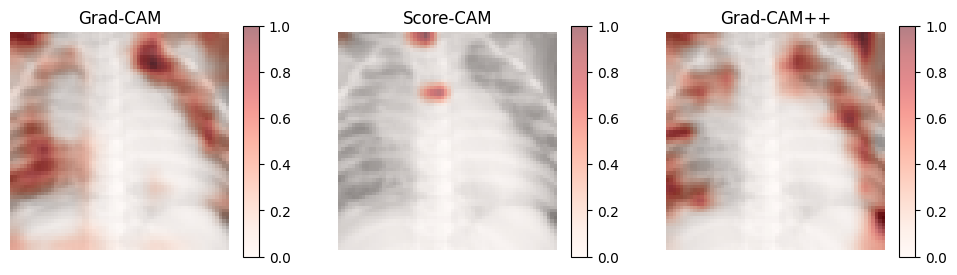

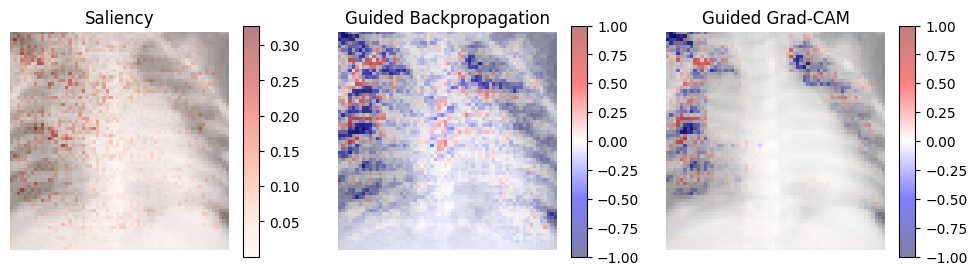

In [ ]:
# iterate through data and show a few examples
for n,val_data in enumerate(val_loader):
        val_image = val_data[0]
        val_label = val_data[1]

        # calculate attributions
        sal_at=saliency.attribute(val_image,target=val_label)

        gradcam_at=gradcam(input_tensor=input_img, targets=None)

        # visualisation
        MAKE_PLOT(sal_at)
        MAKE_PLOT(gradcam_at)

### Latent Space Features

Another method to visualize the model decision is using **latent space features**, i.e. the activation of an intermediate layer of the model. You can analyze it with PCA and/or t-SNE.

(518, 512)
(518, 50)
(518, 2)


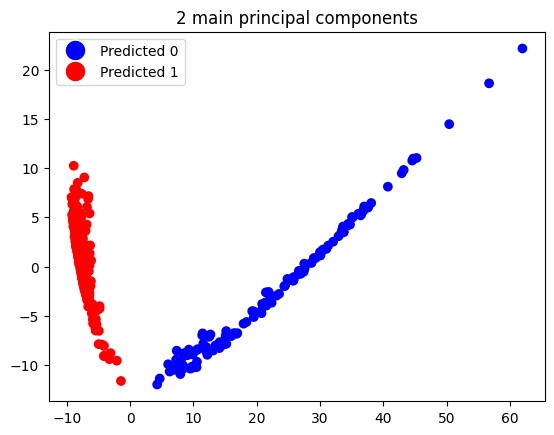

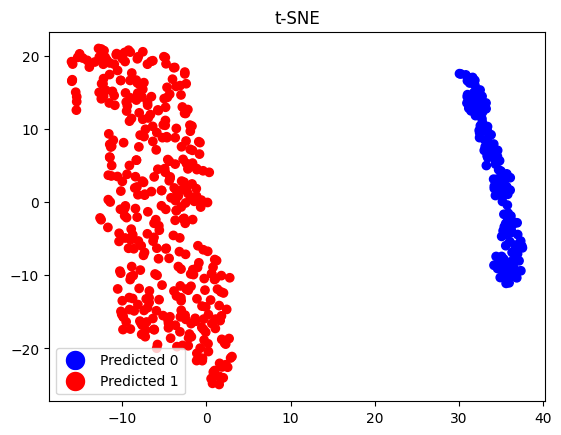

In [ ]:
def extract_feats(pre_model,dataloader,inter_layer):

    ...
    
	return feats



# extract latent space features
feats = extract_feats(model,dataloader,target_layer)


# use PCA to reduce number of features
pca = PCA(n_components = ?)
new_feats = pca.fit_transform(feats)

# use t-SNE to viszualize in 2d
embedded = TSNE().fit_transform(new_feats)


# plot two main components of PCA
plt.plot__scatter(new_feats)
plt.title("2 main principal components")
plt.show()


# plot 2d t-SNE
plt.plot__scatter(embedded)
plt.title("t-SNE")
plt.show()


## Interpretation
The results of the attribution methods sometimes look different. 

**Questions**:

- what kind of interpretability is 'correct' ? do you prefer one of these interpretability tools ? What do you think is missing here ?
- how can the results be interpreted ? could you come-up with an interpretability method which is quite useful and practical in the clinical workflow ?
- can you use this information to improve the model ?

Reading to support the discussion:

* Xie, Yao, et al. "CheXplain: enabling physicians to explore and understand data-driven, AI-enabled medical imaging analysis." Proceedings of the 2020 CHI Conference on Human Factors in Computing Systems. 2020. https://arxiv.org/pdf/2001.05149.pdf
* Ghassemi, Marzyeh, Luke Oakden-Rayner, and Andrew L. Beam. "The false hope of current approaches to explainable artificial intelligence in health care." The Lancet Digital Health 3.11 (2021). https://www.thelancet.com/journals/landig/article/PIIS2589-7500(21)00208-9/fulltext
* Reyes, Mauricio, et al. "On the interpretability of artificial intelligence in radiology: challenges and opportunities." Radiology: artificial intelligence 2.3 (2020). https://pubs.rsna.org/doi/full/10.1148/ryai.2020190043
* https://distill.pub/2017/feature-visualization/